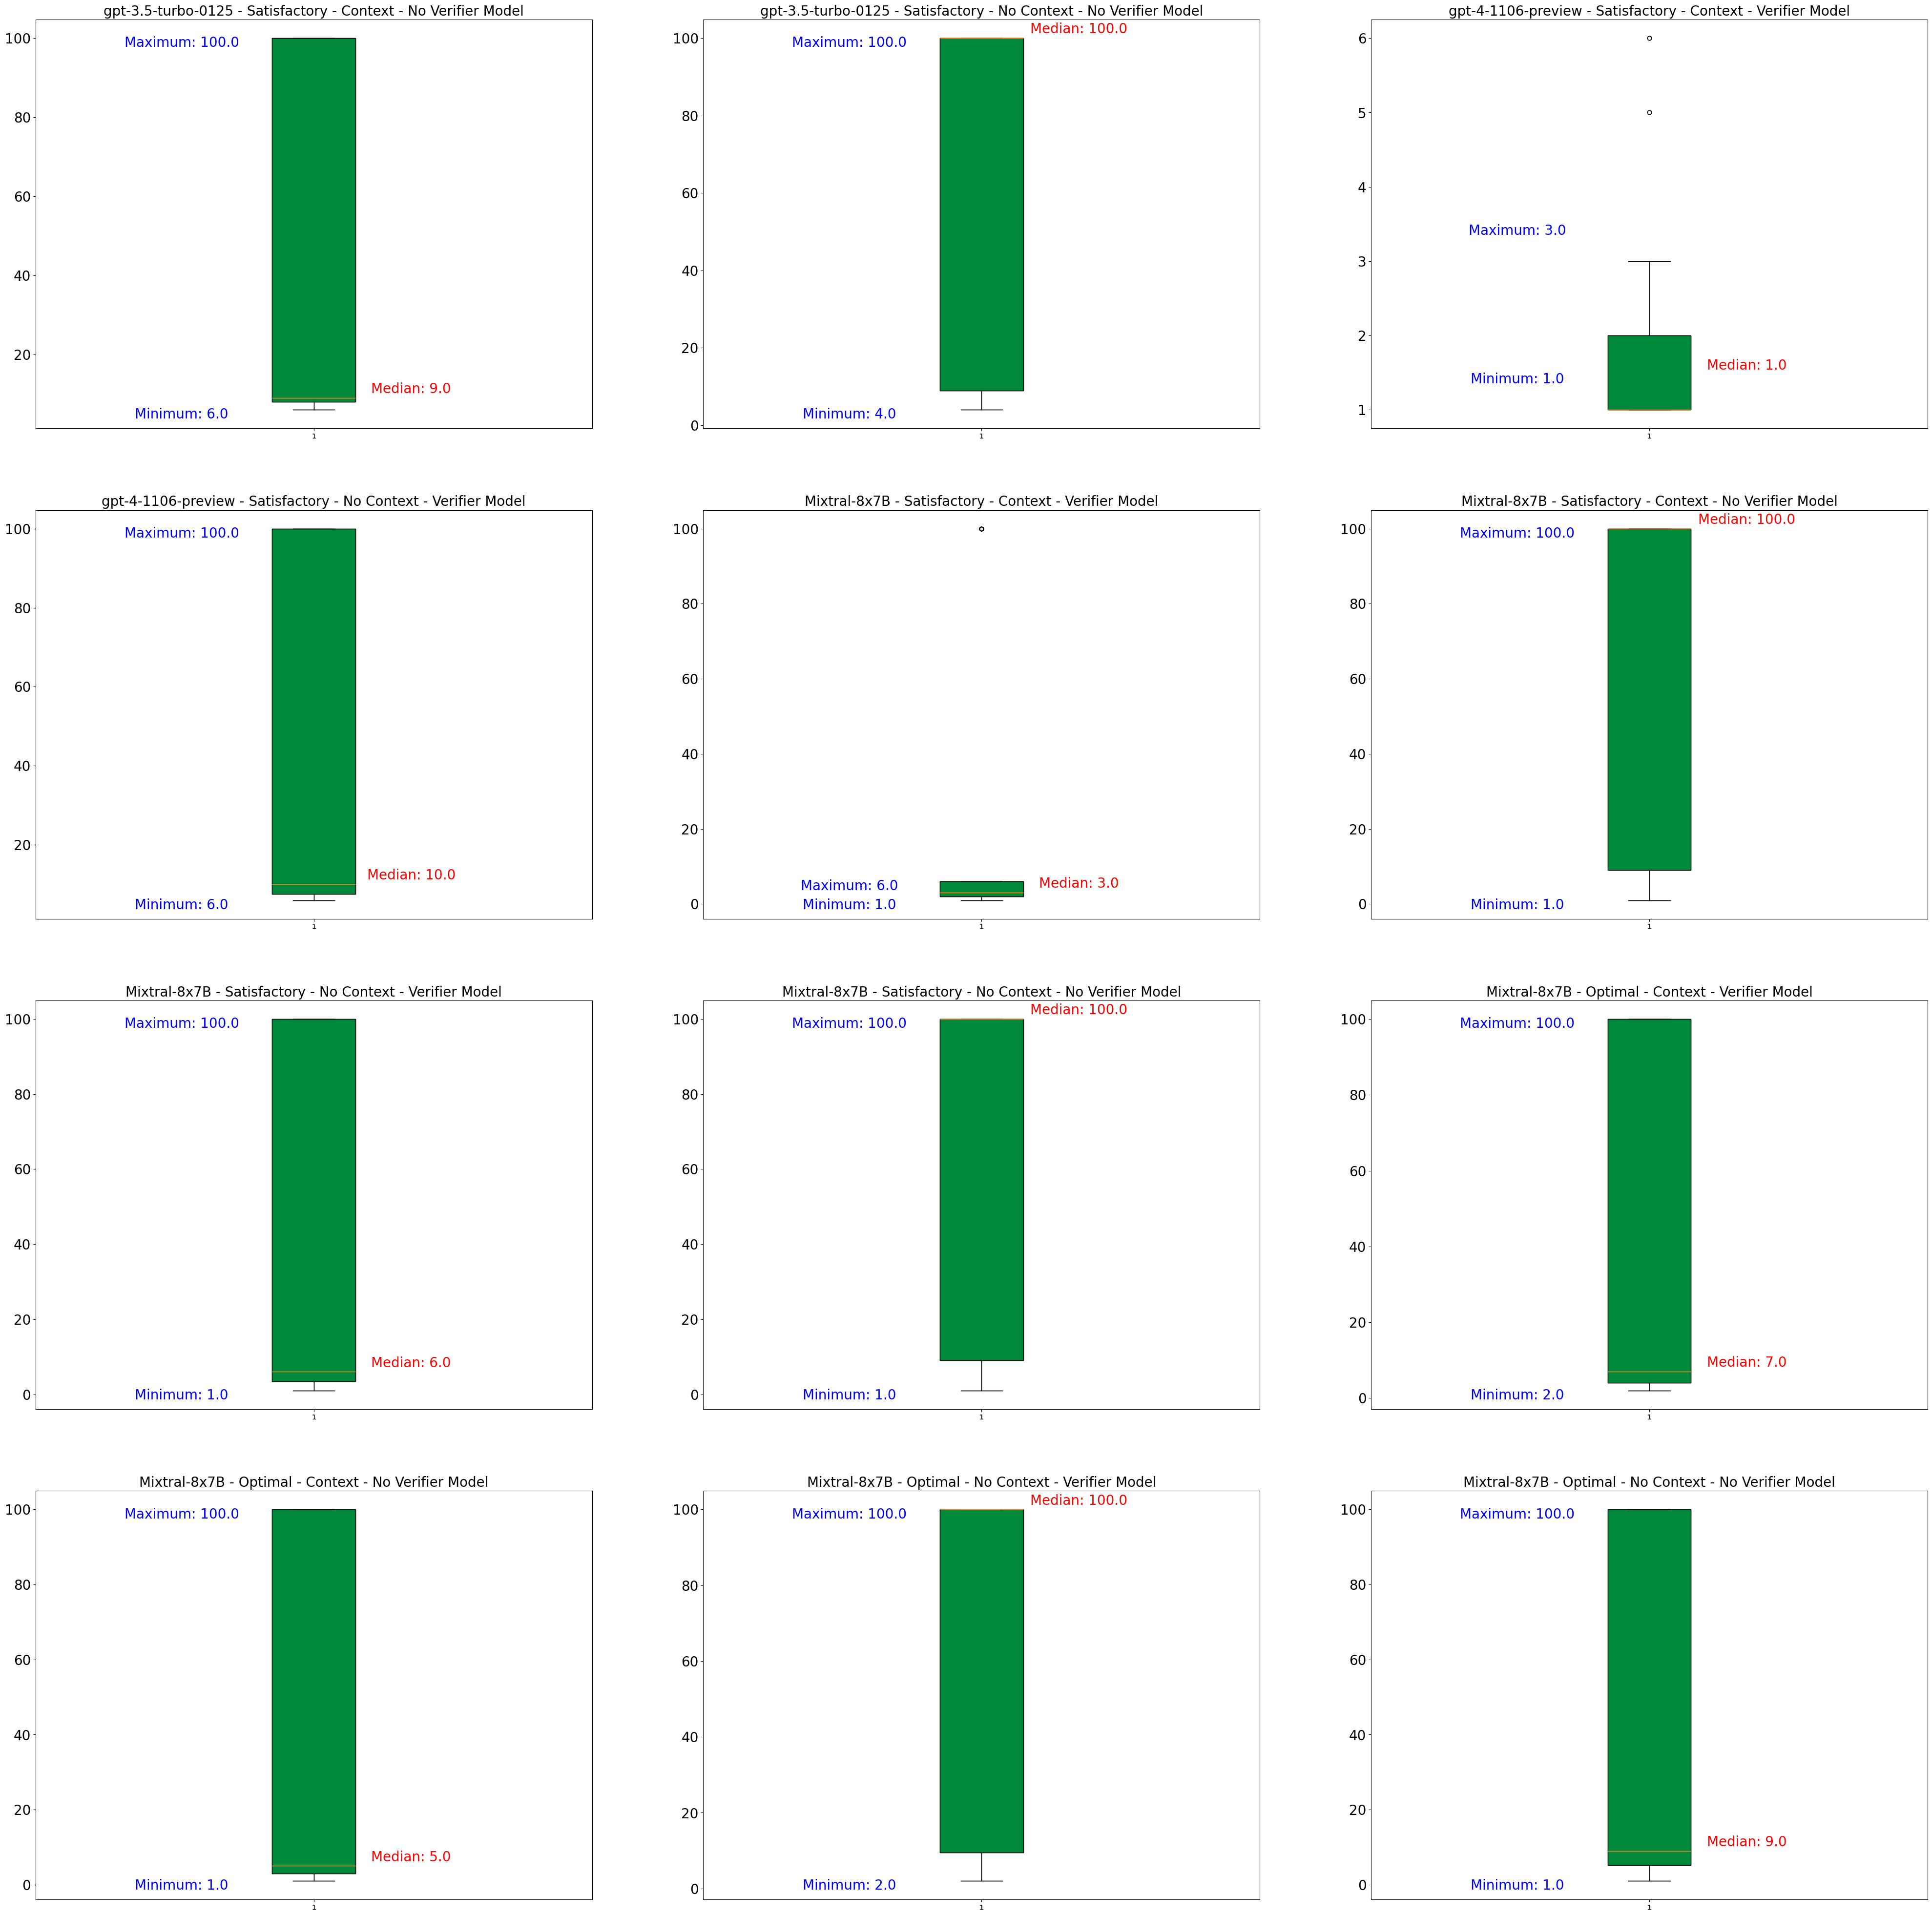

In [122]:
import os
import pandas as pd
import matplotlib.pyplot as plt



directory = '../results/satisfactory'
substring_optimal = 'Optimal MPa'
substring_no_context = 'NoContext'
substring_context = 'Context'
substring_gpt_3_5 = 'gpt-3.5'
substring_gpt_4 = 'gpt-4'
substring_mixtral = 'mixtral'
substring_tt_3 = 'recursive_3'
substring_tt_1 = 'recursive_1'
gpt_3_5_context = []
gpt_3_5_no_context = []
gpt_4_context = []
gpt_4_no_context = []
mixtral_no_context_tt_1 = []
mixtral_no_context_tt_3 = []
mixtral_context_tt_1 = []
mixtral_context_tt_3 = []
mixtral_optimal_context_tt_1 = []
mixtral_optimal_no_context_tt_1 = []
mixtral_optimal_context_tt_3 = []
mixtral_optimal_no_context_tt_3 = []

def group_experiments():
    for file in os.listdir(directory):
        if substring_gpt_3_5 in file:
            if substring_no_context in file:
                gpt_3_5_no_context.append(file)
            else:
                gpt_3_5_context.append(file)
        if substring_gpt_4 in file:
            if substring_no_context in file:
                gpt_4_no_context.append(file)
            else:
                gpt_4_context.append(file)
        if substring_mixtral in file:
            if substring_no_context in file:
                if substring_tt_1 in file:
                    if substring_optimal in file:
                        mixtral_optimal_no_context_tt_1.append(file)
                    else:
                        mixtral_no_context_tt_1.append(file)
                if substring_tt_3 in file:
                    if substring_optimal in file:
                        mixtral_optimal_no_context_tt_3.append(file)
                    else:
                        mixtral_no_context_tt_3.append(file)
            if substring_context in file:
                if substring_tt_1 in file:
                    if substring_optimal in file:
                        mixtral_optimal_context_tt_1.append(file)
                    else:
                        mixtral_context_tt_1.append(file)
                if substring_tt_3 in file:
                    if substring_optimal in file:
                        mixtral_optimal_context_tt_3.append(file)
                    else:
                        mixtral_context_tt_3.append(file)
    # print(mixtral_no_context_tt_1)
    return [gpt_3_5_context, gpt_3_5_no_context], [gpt_4_context, gpt_4_no_context], [mixtral_context_tt_1, mixtral_context_tt_3, mixtral_no_context_tt_1, mixtral_no_context_tt_3, mixtral_optimal_context_tt_1, mixtral_optimal_context_tt_3, mixtral_optimal_no_context_tt_1, mixtral_optimal_no_context_tt_3]


# print('gpt 3.5 context',gpt_3_5_context)
# print('gpt 3.5 no context',gpt_3_5_no_context)
# print('gpt 4 context',gpt_4_context)
# print('gpt 4 no context',gpt_4_no_context)
def calculate_par_for_configuration(model_configuration): 
    # dev_cycles_configuration = []
    
    dev_cycles_experiment = []
    for experiment in model_configuration:
        df = pd.read_csv('../results/satisfactory/' + experiment, encoding='unicode_escape')
        if df.shape[0] == 10:
            if df.iloc[-1]["Compressive Strength"] >= 62:
                dev_cycles_experiment.append(df.shape[0])
            else:
                dev_cycles_experiment.append(100)
        else:
            dev_cycles_experiment.append(df.shape[0])
        
    # par = dev_cycles / amount_of_experiments
    return dev_cycles_experiment

def calculate_par_scores(configurations):
    par_scores = []
    
    for configuration in configurations:
        par_score = calculate_par_for_configuration(configuration)
        par_scores.append(par_score)
    return par_scores

def calc_avg_par_config(config):
    amount_of_experiments = len(config)
    dev_cycles_experiment = 0
    for experiment in config:
        df = pd.read_csv('../results/satisfactory/' + experiment, encoding='unicode_escape')
        if df.shape[0] == 10:
            if df.iloc[-1]["Compressive Strength"] >= 62:
                dev_cycles_experiment+=(df.shape[0])
            else:
                dev_cycles_experiment += 100
        else:
            dev_cycles_experiment +=df.shape[0]

    avg_par = dev_cycles_experiment/amount_of_experiments
    return avg_par

def calculate_average_par_scores(configurations):
    avg_par_scores = []
    for configuration in configurations:
        par_score = calc_avg_par_config(configuration)
        avg_par_scores.append(par_score)
    return avg_par_scores

def calc_averages():
    gpt_3_5_configurations = ["gpt-3.5-turbo-0125 - Satisfactory - Context - No Verifier Model", "gpt-3.5-turbo-0125 - Satisfactory - No Context - No Verifier Model"]
    gpt_4_configurations = ["gpt-4-1106-preview - Satisfactory - Context - Verifier Model", "gpt-4-1106-preview - Satisfactory - No Context - Verifier Model"]
    mixtral_configurations = ["Mixtral-8x7B - Satisfactory - Context - Verifier Model", "Mixtral-8x7B - Satisfactory - Context - No Verifier Model", "Mixtral-8x7B - Satisfactory - No Context - Verifier Model", "Mixtral-8x7B - Satisfactory - No Context - No Verifier Model", "Mixtral-8x7B - Optimal - Context - Verifier Model", "Mixtral-8x7B - Optimal - Context - No Verifier Model", "Mixtral-8x7B - Optimal - No Context - Verifier Model", "Mixtral-8x7B - Optimal - No Context - No Verifier Model"]
    gpt_3_5, gpt_4, mixtral = group_experiments()
    gpt_3_5_par_scores = calculate_average_par_scores(gpt_3_5)
    gpt_4_par_scores= calculate_average_par_scores(gpt_4)
    mixtral_par_scores = calculate_average_par_scores(mixtral)
    par_scores = gpt_3_5_par_scores + gpt_4_par_scores + mixtral_par_scores
    model_configurations = gpt_3_5_configurations + gpt_4_configurations  + mixtral_configurations
    res = [(i, str(j)) for i, j in zip(model_configurations, par_scores)]
    for x in res:
        print(x)
     


def create_bar_plot():
    gpt_3_5_configurations = ["gpt-3.5-turbo-0125 - Satisfactory - Context - No Verifier Model", "gpt-3.5-turbo-0125 - Satisfactory - No Context - No Verifier Model"]
    gpt_4_configurations = ["gpt-4-1106-preview - Satisfactory - Context - Verifier Model", "gpt-4-1106-preview - Satisfactory - No Context - Verifier Model"]
    mixtral_configurations = ["Mixtral-8x7B - Satisfactory - Context - Verifier Model", "Mixtral-8x7B - Satisfactory - Context - No Verifier Model", "Mixtral-8x7B - Satisfactory - No Context - Verifier Model", "Mixtral-8x7B - Satisfactory - No Context - No Verifier Model", "Mixtral-8x7B - Optimal - Context - Verifier Model", "Mixtral-8x7B - Optimal - Context - No Verifier Model", "Mixtral-8x7B - Optimal - No Context - Verifier Model", "Mixtral-8x7B - Optimal - No Context - No Verifier Model"]
    gpt_3_5, gpt_4, mixtral = group_experiments()
    gpt_3_5_par_scores = calculate_par_scores(gpt_3_5)
    gpt_4_par_scores= calculate_par_scores(gpt_4)
    mixtral_par_scores = calculate_par_scores(mixtral)


    par_scores = gpt_3_5_par_scores + gpt_4_par_scores + mixtral_par_scores
    # print(par_scores)
    model_configurations = gpt_3_5_configurations + gpt_4_configurations  + mixtral_configurations

    fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(50, 50))

    ax[0, 0].boxplot(par_scores[0], patch_artist=True)
    ax[0, 0].set_title("gpt-3.5-turbo-0125 - Satisfactory - Context - No Verifier Model", fontsize=20)


    ax[0, 1].boxplot(par_scores[1], patch_artist=True)
    ax[0, 1].set_title(gpt_3_5_configurations[1], fontsize=20)


    ax[0, 2].boxplot(par_scores[2], patch_artist=True)
    ax[0, 2].set_title(gpt_4_configurations[0], fontsize=20)


    ax[1, 0].boxplot(par_scores[3], patch_artist=True)
    ax[1, 0].set_title(gpt_4_configurations[1], fontsize=20)


    ax[1, 1].boxplot(par_scores[4], patch_artist=True)
    ax[1, 1].set_title(mixtral_configurations[0], fontsize=20)


    ax[1, 2].boxplot(par_scores[5], patch_artist=True)
    ax[1, 2].set_title(mixtral_configurations[1], fontsize=20)


    ax[2, 0].boxplot(par_scores[6], patch_artist=True)
    ax[2, 0].set_title(mixtral_configurations[2], fontsize=20)


    ax[2, 1].boxplot(par_scores[7], patch_artist=True)
    ax[2, 1].set_title(mixtral_configurations[3], fontsize=20)

    ax[2, 2].boxplot(par_scores[8], patch_artist=True)
    ax[2, 2].set_title(mixtral_configurations[4], fontsize=20)


    ax[3, 0].boxplot(par_scores[9], patch_artist=True)
    ax[3, 0].set_title(mixtral_configurations[5], fontsize=20)


    ax[3, 1].boxplot(par_scores[10], patch_artist=True)
    ax[3, 1].set_title(mixtral_configurations[6], fontsize=20)


    ax[3, 2].boxplot(par_scores[11], patch_artist=True)
    ax[3, 2].set_title(mixtral_configurations[7], fontsize=20)



    data_list = par_scores
    axes_list = [ax[0, 0], ax[0, 1], ax[0, 2], ax[1, 0],ax[1, 1], ax[1, 2], ax[2, 0], ax[2, 1], ax[2,2],  ax[3, 0], ax[3, 1], ax[3,2] ]


# Loop through each set of data and corresponding axis
    for ax, data in zip(axes_list, data_list):
        # Creating boxplot
        bp = ax.boxplot(data, patch_artist=True)

        for patch in bp['boxes']:
            patch.set_facecolor('#00883b')

        # Annotate median and whisker caps
        for median in bp['medians']:
            median_x, median_y = median.get_xydata()[1]  # get median position
            ax.annotate(f'Median: {median_y:.1f}', xy=(median_x, median_y), xytext=(median_x+0.1, median_y+0.5), 
                        textcoords='data', ha='center', va='bottom', fontsize=20, color='red')

        for cap in bp['caps']:
            cap_x, cap_y = cap.get_xydata()[0]  # get cap position
            cap_name = 'Minimum' if cap == bp['caps'][0] else 'Maximum'
            ax.annotate(f'{cap_name}: {cap_y:.1f}', xy=(cap_x, cap_y), xytext=(cap_x-0.2, cap_y-0.5 if cap_name == 'Lower Cap' else cap_y+0.5),
                        textcoords='data', ha='center', va='bottom' if cap_name == 'Lower Cap' else 'top', fontsize=20, color='blue')
        ax.tick_params(axis='y', labelsize=20) 

    # boxplots = ax.boxplot(par_scores, patch_artist=True, showmeans=True)

    # for i, line in enumerate(boxplots['medians']):
    #     x, y = line.get_xydata()[1]  # top of median line
    #     ax.annotate(f'Median: {y:.1f}', xy=(x, y), xytext=(x+0.1, y), 
    #             textcoords='data', ha='center', va='bottom', fontsize=9, color='blue')
    
    # for i, cap in enumerate(boxplots['caps']):
    #     x, y = cap.get_xydata()[0]  # bottom or top of the cap
    #     cap_name = 'Lower Whisker' if i % 2 == 0 else 'Upper Whisker'
    #     ax.annotate(f'{cap_name}: {y:.1f}', xy=(x, y), xytext=(x, y - 0.5 if i % 2 == 0 else y + 0.5),
    #                 textcoords='data', ha='center', va='bottom' if i % 2 == 0 else 'top', fontsize=9, color='pink')


    # print(gpt_4_par_scores)
#
    # ax.set_xticklabels(model_configurations)

    # ax.set_title('Boxplot of Multiple Datasets')
    # ax.set_xlabel('Dataset Names')
    # ax.set_ylabel('Values')

    plt.show()



create_bar_plot()
# calc_averages()